In [60]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

np.set_printoptions(suppress=True)

In [25]:
usage = pd.read_excel('./data/usage.xlsx')

In [26]:
usage.head()

,Part Number,1,2,3,4,5,6,7,8,9,...,242,243,244,245,246,247,248,249,250,251
0,2020-09-01,0,0,0,2000,0,0,100,0,0,...,0,92,18,0,0,0,0,0,0,0
1,2020-08-01,0,0,7000,0,0,0,0,0,0,...,0,4000,1500,0,0,120,0,0,0,0
2,2020-07-01,0,0,2000,6000,20000,0,200,0,0,...,7300,0,60,3100,750,320,2250,2000,0,0
3,2020-06-01,0,0,0,4000,20000,0,100,0,250,...,617,1709,1381,2400,0,300,0,0,0,100
4,2020-05-01,40,0,0,2000,0,1000,0,0,290,...,7000,4000,0,3000,750,20,2250,2000,200,0


In [27]:
usage.shape

(54, 252)

In [28]:
usage.rename(columns={'Part Number':'Month'}, inplace=True)
usage.head(3)

,Month,1,2,3,4,5,6,7,8,9,...,242,243,244,245,246,247,248,249,250,251
0,2020-09-01,0,0,0,2000,0,0,100,0,0,...,0,92,18,0,0,0,0,0,0,0
1,2020-08-01,0,0,7000,0,0,0,0,0,0,...,0,4000,1500,0,0,120,0,0,0,0
2,2020-07-01,0,0,2000,6000,20000,0,200,0,0,...,7300,0,60,3100,750,320,2250,2000,0,0


In [29]:
usage[4]

0      2000
1         0
2      6000
3      4000
4      2000
5         0
6     16000
7      8000
8      4000
9      8000
10     8100
11     8000
12        0
13     8000
14     2000
15     6000
16     6000
17    10000
18     4000
19     9800
20    10000
21     1000
22     6000
23     4000
24     6000
25     6000
26     4000
27     4000
28     4000
29    10000
30        0
31        0
32        0
33    17000
34     8700
35     6000
36     6000
37     8000
38        0
39     8600
40        0
41     6000
42        0
43     4400
44        0
45        0
46    14000
47     9000
48        0
49        0
50        0
51        0
52        0
53        0
Name: 4, dtype: int64

In [30]:
usage['month_idx'] = pd.to_datetime(usage['Month'])
usage = usage.set_index('month_idx')
usage.drop(['Month'], axis=1, inplace=True)
usage.head()

,1,2,3,4,5,6,7,8,9,10,...,242,243,244,245,246,247,248,249,250,251
month_idx,,,,,,,,,,,,,,,,,,,,,
2020-09-01,0,0,0,2000,0,0,100,0,0,0,...,0,92,18,0,0,0,0,0,0,0
2020-08-01,0,0,7000,0,0,0,0,0,0,0,...,0,4000,1500,0,0,120,0,0,0,0
2020-07-01,0,0,2000,6000,20000,0,200,0,0,0,...,7300,0,60,3100,750,320,2250,2000,0,0
2020-06-01,0,0,0,4000,20000,0,100,0,250,0,...,617,1709,1381,2400,0,300,0,0,0,100
2020-05-01,40,0,0,2000,0,1000,0,0,290,0,...,7000,4000,0,3000,750,20,2250,2000,200,0


In [39]:
part_usage = usage[220]

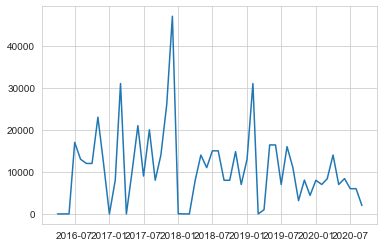

In [40]:
plt.plot(part_usage)

In [35]:
log_usage = np.log(part_usage)

/Users/joshua/miniconda/envs/stats/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [44]:
part_usage[part_usage == 0] = 1

In [45]:
log_usage = np.log(part_usage)

In [72]:
time_period = 24
mu = log_usage[:time_period].mean()
sigma = log_usage[:time_period].std()
print(mu, sigma)

8.590003490475093 1.9679130287517104


In [73]:
one_random_month_usage = np.random.lognormal(mu, sigma)
one_random_month_usage

39413.424980271695

In [74]:
annual_usage = np.random.lognormal(mu, sigma, time_period)
annual_usage

array([ 6732.40707106, 15724.1337854 , 44609.46539563,  2526.0433236 ,
       22982.21456305, 12758.45193892,   662.04129462,  8457.21577098,
         429.08788507,   113.44936855,  2486.63184636,  3088.79927591,
       11426.91490434,   143.59737824,  3636.25234826, 32440.03079363,
       86557.58702141,  1295.93767306,  1092.29841163, 12271.89201377,
       41092.92641809,  9975.37424607,  3755.4926409 , 10315.94292356])

In [75]:
fake_usage = pd.DataFrame(annual_usage, index=usage.index[:time_period], columns=['fake_part_1'])
fake_usage.head()

,fake_part_1
month_idx,
2020-09-01,6732.407071
2020-08-01,15724.133785
2020-07-01,44609.465396
2020-06-01,2526.043324
2020-05-01,22982.214563


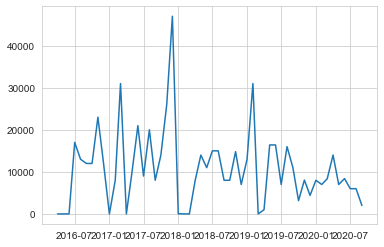

In [76]:
plt.plot(part_usage)

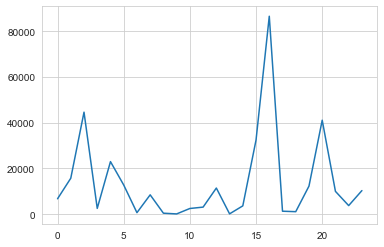

In [77]:
plt.plot(annual_usage)

In [78]:
def model_usage_from_part(usage, time_periods):
    # Grab the log of the actual usage
    log_usage = np.log(usage)
    
    # Clean that up
    log_usage.replace([np.inf, -np.inf], 0, inplace=True)
    
    # Grab the stats from the acutal usage
    mu = log_usage[:time_periods].mean()
    sigma = log_usage[:time_periods].std()
    
    # Create a random usage array using those stats
    usage_array = np.random.lognormal(mu, sigma, time_periods)
    
    # Return the array for usage in 
    return usage_array

In [80]:
random_usage = model_usage_from_part(usage[220][:24], 24)
random_usage

array([  1697.05318892,   1002.70857741,   5914.15686879,    168.81636206,
          826.93006801,   1362.76948331,  33841.3246135 ,   7040.35859967,
          102.16018102,    261.55000418, 122129.79456643,    121.81755017,
         2085.83207416,     59.14249472,   2906.88779289,   7403.3076273 ,
         7740.90131962,    512.06949354,  67331.55655696, 151701.16188779,
          288.2399478 ,    187.44625746,   6607.56441916,    540.77991004])

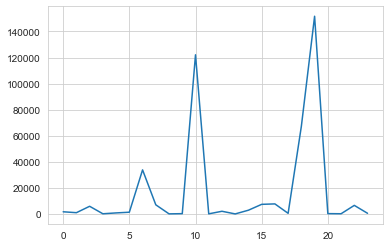

In [81]:
plt.plot(random_usage)